<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduation Project: Image Processing with Convolutional Neural Networks

Images of happy, shocked & sad faces.

---
# 1. Introduction

## 1.1 Importing Files & Modules

In [1]:
from google.colab import drive
drive.mount("/content/drive/")
%cd "/content/drive/My Drive/MertColab/project5/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/MertColab/project5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, os, io
import cv2
from zipfile import ZipFile
from PIL import Image

In [3]:
shock_zip = ZipFile("shock.zip", "r")
happy_zip = ZipFile("happy.zip", "r")
sad_zip = ZipFile("sad.zip", "r")

In [4]:
shock_img = []
happy_img = []
sad_img = []
for var_zip, var_img in zip((shock_zip, happy_zip, sad_zip),
                          (shock_img, happy_img, sad_img)):
    for img_name in var_zip.namelist():
        byte_data = var_zip.read(img_name)
        img = io.BytesIO(byte_data)
        img = np.array(Image.open(img))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, code=8) if len(img.shape) != 3 else img   # note
        var_img.append(img)
shock_img = np.asarray(shock_img)
happy_img = np.asarray(happy_img)
sad_img = np.asarray(sad_img)

In the "noted" line above, <code>code = 8</code> refers to <code>cv2.COLOR_GRAY2BGR</code> (see the [link](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)).<br>This conversation is required since there are 8bpp images in the dataset. The rest is in 24bpp (RGB).

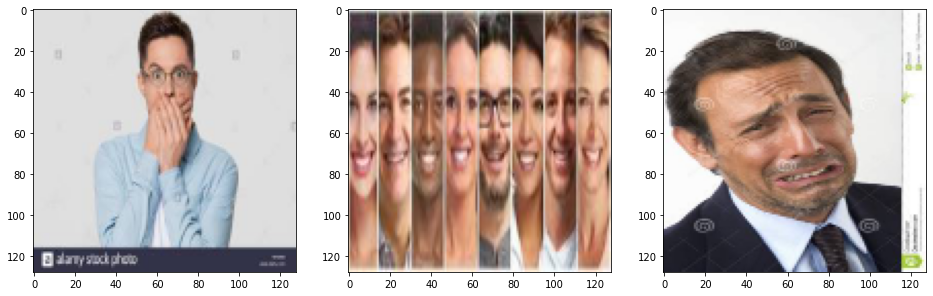

In [5]:
plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(shock_img[np.random.randint(0,150)])
plt.subplot(1,3,2)
plt.imshow(happy_img[np.random.randint(0,150)])
plt.subplot(1,3,3)
plt.imshow(sad_img[np.random.randint(0,150)])
plt.show()

We are going to create an **X_train** which will contain arrays of the images & a **y_train** to hold the label numbers. There will be some points that need to be paid close attention.

1) Both **X_train** & **y_train** will be sequential! First 180 images will belong to *sad* class, the second 180 is for the *shock* class and the last sequence corresponds to the *happy* people. Thus, when training the model, one should remember to shuffle the batches to avoid any obstacle on the learning path.

2) **y_train** has only numbers, which are **0**, **1** and **2**. These are the *sad*, *shocked* & *happy* classes, respectively.

3) About 100 images will be put aside for the test set. So there will be less than $3 * 180 = 540$ images in the train set. Numbers may change.

In [6]:
X_train = np.concatenate([sad_img, shock_img, happy_img], axis=0)
y_train = np.array([0]*180 + [1]*180 + [2]*180)

# 100 pictures in total were chosen for the test set
np.random.seed(42)
random_sad = np.random.choice(range(0, 180), 33, replace=False)
random_shock = np.random.choice(range(180, 360), 33, replace=False)
random_happy = np.random.choice(range(360, 540), 34, replace=False)
random_indices = np.concatenate([random_sad,
                                 random_shock,
                                 random_happy])

X_test = X_train[random_indices]
y_test = y_train[random_indices]
# let's remove the selected pictures from the train set
X_train = np.delete(X_train, random_indices, axis=0)
y_train = np.delete(y_train, random_indices, axis=0)

del random_sad, random_shock, random_happy, random_indices

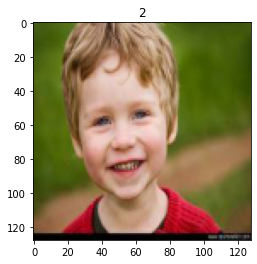

In [7]:
plt.imshow(X_test[75])
plt.title(y_test[75])
plt.show()

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [9]:
# https://keras.io/api/preprocessing/image/
train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=45,
    width_shift_range=0.20,
    height_shift_range=0.20,
    brightness_range=None,
    shear_range=0.20,
    zoom_range=0.50,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

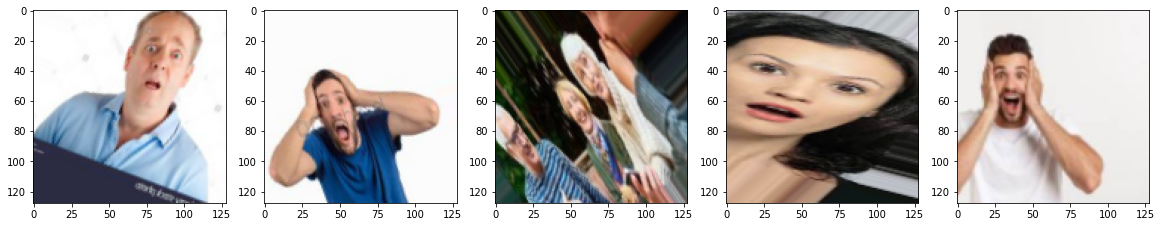

In [10]:
plt.figure(figsize=(20,20))
for i, picture in enumerate(train_datagen.flow(X_train)):
    plt.subplot(1,5,i+1)
    plt.imshow(array_to_img(picture[0]))
    if i == 4 :  # 
        break
    
plt.show()